In [1]:
# === CONFIG + MODULE IMPORTS ===

# Load environment variables
from dotenv import load_dotenv
load_dotenv()

# Add the modules directory to Python’s import path
import os
import sys
sys.path.append(os.path.abspath("../modules"))

# Standard imports
import pandas as pd
from datetime import datetime, timedelta, timezone

# === MODULE FUNCTIONS ===

# Jira API call to get WIP issues
from jira_api import get_wip_issues

# Metric calculations for WIP ranges
from metrics_calculations import parse_wip_ranges

# Visual output for charts and debug tables
from visualizations import (
    plot_daily_wip_time_series,
    plot_monthly_average_wip,
    show_daily_wip_table,
    debug_daily_wip_table,
    debug_monthly_wip_aggregation
)

# === CONFIGURABLE TOGGLES ===

PROJECT_KEY = "ITEUC"              # Change to target Jira project
DAYS_LOOKBACK = 30                 # For daily WIP line chart (e.g., past 30 days)
MONTHS_LOOKBACK = 6                # For monthly average WIP view (e.g., past 6 months)


In [2]:
# # === FETCH & PARSE WIP ISSUES ===

# Calculate full lookback window
end_date = datetime.now(timezone.utc).replace(hour=23, minute=59, second=59, microsecond=999999)
start_date = end_date - timedelta(days=MONTHS_LOOKBACK * 31)

# Fetch issues (with changelog)
issues = get_wip_issues(PROJECT_KEY, days=MONTHS_LOOKBACK * 31)

# Parse changelog intervals (returns enriched records and missing metadata)
wip_records, missing_details = parse_wip_ranges(issues, end_date)

# Summary
print(f"Issues retrieved: {len(issues)}")
print(f"WIP intervals parsed: {len(wip_records)}")

Issues retrieved: 70
WIP intervals parsed: 90


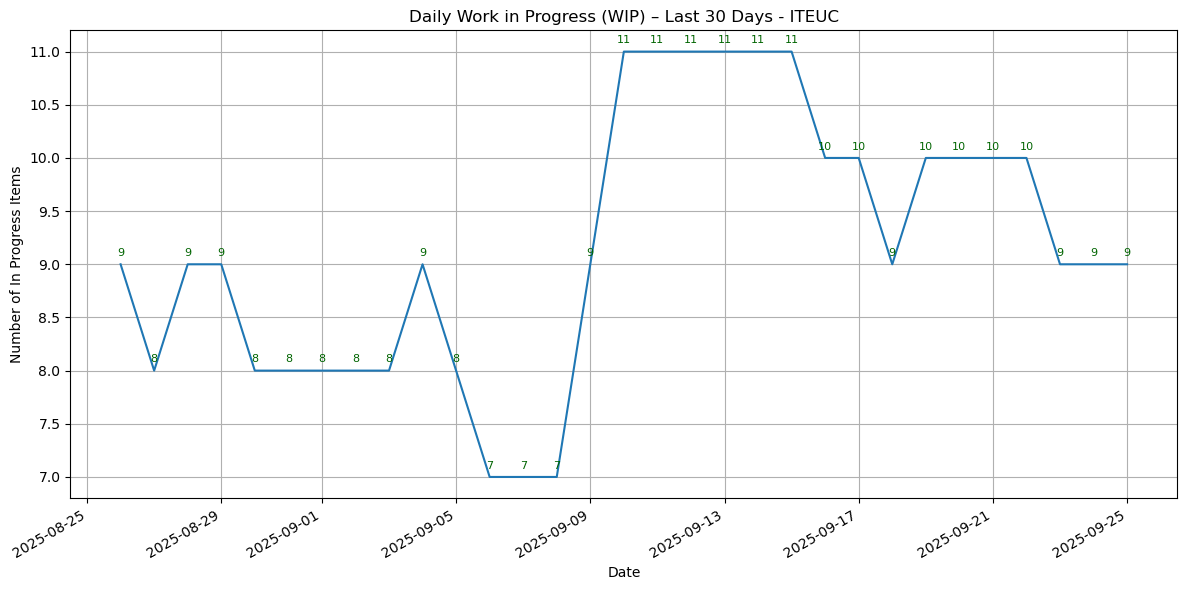


WIP Count on 2025-09-24: 9
Max WIP: 11
Min WIP: 7
Avg WIP: 9.2


In [3]:
# === DAILY WIP LINE CHART ===

# Main visualization of daily WIP counts (past N days)
plot_daily_wip_time_series(wip_records, DAYS_LOOKBACK, PROJECT_KEY)

# === Optional: Full WIP Table View ===
# Uncomment to view daily WIP values in table format if annotations are crowded
# show_daily_wip_table(wip_records, DAYS_LOOKBACK, PROJECT_KEY)


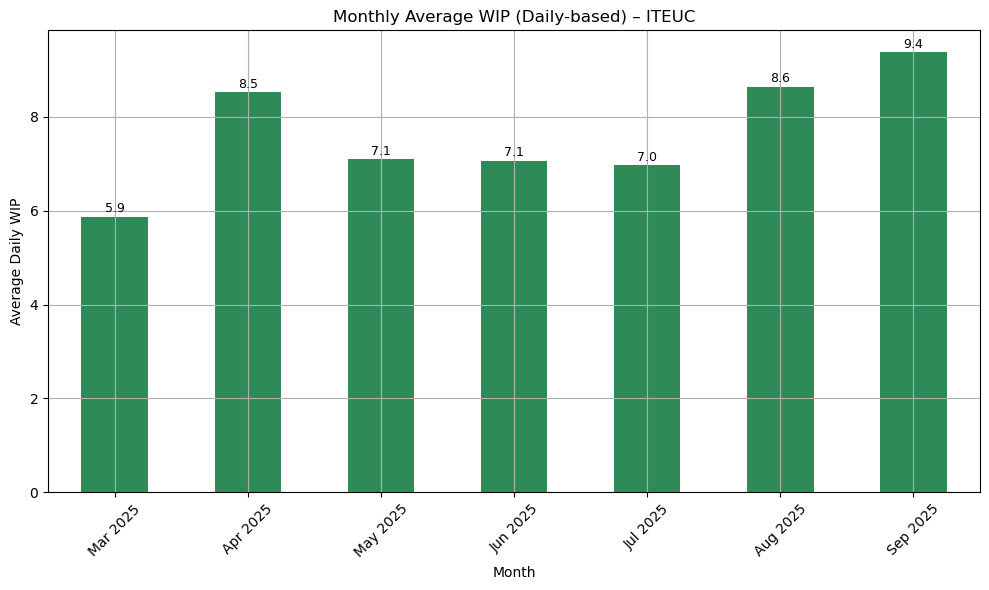

In [4]:
# === MONTHLY AVERAGE WIP CHART ===
plot_monthly_average_wip(wip_records, MONTHS_LOOKBACK, PROJECT_KEY)

In [5]:
# === DEBUG: Daily WIP Table (Optional) ===

# Uncomment to inspect raw daily WIP data used in the line chart
# debug_daily_wip_table(wip_records, DAYS_LOOKBACK)

# === DEBUG: Monthly WIP Average Aggregation (Optional) ===

# Uncomment to see how each month's daily counts were computed
# debug_monthly_wip_aggregation(wip_records, MONTHS_LOOKBACK)

# === DEBUG: WIP Issues Active in a Specific Month ===

# from metrics_calculations import get_issues_in_progress_in_month

# target_month = "2025-01"  # Format: YYYY-MM
# df_month_wip = get_issues_in_progress_in_month(wip_records, target_month)

# print(f"Issues In Progress During {target_month}: {len(df_month_wip)}")
# display(df_month_wip)
